<a href="https://colab.research.google.com/github/eunbi2000/machine-learning/blob/main/P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE378 Programming Assignment 2 -- Monte Carlo and Q-Learning
The goal of this assignment is to implement the RL algorithms listed as follows:
1. <b>Monte-Carlo</b> with a **tabular** state action value function
2. <b>Q-learning</b> with a **tabular** state action value function

You will be using 2 Gymnasium environments (Cartpole-v1 and MountainCar-v0). As the behavior policy of off-policy RL methods, use epsilon-greedy. Mainly you will need to follow:
https://docs.google.com/presentation/d/11Hh0eXrJfznoOwHplXfk9yAPWFWeJ_PnpPBwrtyLgR8/edit#slide=id.g7e014821d8_0_256
https://docs.google.com/presentation/d/1kR098WCtvhd5yZ9DYq7q8CU-kRTXS4YXKEj8vE-d54E/edit#slide=id.g7e14319937_0_377

###Please only add/change the part surrounded by the marks below, some hints or requirements are also noted in comments at the lines you need to fill
```
#====Please write your codes here======

#======================================
```

###Submission

Please submit the required materials through Brightspace. The instructions are below and they are also available in Brightspace:

- Please find the assignment in attached colab or this link https://colab.research.google.com/drive/1cB9rKQLZ56wfpsOOhezdf_dukZ-lgtm9?usp=sharing. Oh you are actually viewing this colab, good job!

- Please use your **@stonybrook.edu** account to access the assignment colab and edit its copy.

- For submission, please submit **(1) a link to your finished colab and (2) a copy of your colab file.**
  - To get the link and share it, please reach to colab top right -- share->general access->select Stony Brook University, and submit the link in this assignment.
  - To get a copy of your colab, reach to colab top left -- file->download->download .ipynb. The format of the submitted filename will follow \<SBUID\>_\<last name\>_\<first name\>_cse378pa1.ipynb. For example: 123445678_carrot_melon_cse378pa1.ipynb
  - Make sure that once the TA clicks [Run all], the algorithm works and reproduces the results in the submission.

###Grading
- Consider full points of 100.
- Discretization ( 10 points in total -- 5 points x 2 environments)
- Core codes of 2 algorithms with comments. The comments should reflect your understanding or design of the algorithm. ( 50 points in total -- 25 points x 2 algorithms)
- 4 plots (2 algorithms x 2 environments): the cumulative rewards (Y-axis) vs # of episodes (X-axis), to show the trends of rewards during learning. One plot represents one algorithm under one environment. (20 points in total -- 5 point each x 2 algorithms x 2 environments)
- Evaluation of the final policy of each method. Run the final policy tens of times, and average the return. Then give the results and conclusion. (20 points in total -- 5 points x 2 algorithms x 2 environments)
- Note on rubric: the assignment will focus on implementing the algorithm correctly. The actual performance, e.g., how much cumulative rewards the algorithms got, are not important.

###Late Submission Policy

The late submission penalty will be 10% grade of that assignment per late day (24 hours). The final grade of a late submitted assignment = (1 - pentalty) * your original grade.
For example, being late for 3 hours will count for 1 day and get 90% of your orignal grade; being late for 1 day + 2 hours will count for 2 days and get 80% of your original grade.


In [ ]:
!pip install gymnasium[classic-control]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 9.8 MB/s eta 0:00:00


In [ ]:
import imageio
from IPython.display import Image, display
from io import BytesIO

# Code for visualizing the episode

class GIFMaker:
    def __init__(self):
        self.reset()

    def reset(self):
        self.images = []
        self.buffer = BytesIO()

    def append(self, img):
        self.images.append(img)

    def display(self):
        imageio.mimsave(self.buffer, self.images, format='gif')
        gif = Image(data=self.buffer.getvalue())
        display(gif)
        return gif

    def __len__(self):
      return len(self.images)

## Env1 CartPole-v1
Detailed information of this environment:
https://gymnasium.farama.org/environments/classic_control/cart_pole/

0 1 [ 0.02727336  0.18847767  0.03625453 -0.26141977] 1.0
1 1 [ 0.03104291  0.38306385  0.03102613 -0.5424507 ] 1.0
2 0 [ 0.03870419  0.1875199   0.02017712 -0.24015574] 1.0
3 1 [ 0.04245459  0.38234788  0.015374   -0.5264066 ] 1.0
4 0 [ 0.05010155  0.18701302  0.00484587 -0.22891912] 1.0
5 1 [ 5.3841807e-02  3.8206539e-01  2.6748964e-04 -5.2006954e-01] 1.0
6 0 [ 0.06148311  0.18693967 -0.0101339  -0.22730236] 1.0
7 0 [ 0.06522191 -0.00803601 -0.01467995  0.06216682] 1.0
8 1 [ 0.06506119  0.1872933  -0.01343661 -0.23511133] 1.0
9 1 [ 0.06880706  0.38260463 -0.01813884 -0.5320021 ] 1.0
10 1 [ 0.07645915  0.57797694 -0.02877888 -0.8303449 ] 1.0
11 0 [ 0.08801869  0.38325995 -0.04538578 -0.54685014] 1.0
12 1 [ 0.09568389  0.5789892  -0.05632278 -0.8534805 ] 1.0
13 0 [ 0.10726367  0.38467833 -0.07339239 -0.5790266 ] 1.0
14 0 [ 0.11495724  0.19065751 -0.08497293 -0.3103368 ] 1.0
15 1 [ 0.11877038  0.38688084 -0.09117966 -0.6285618 ] 1.0
16 0 [ 0.126508    0.19314174 -0.1037509  -0.36593005]

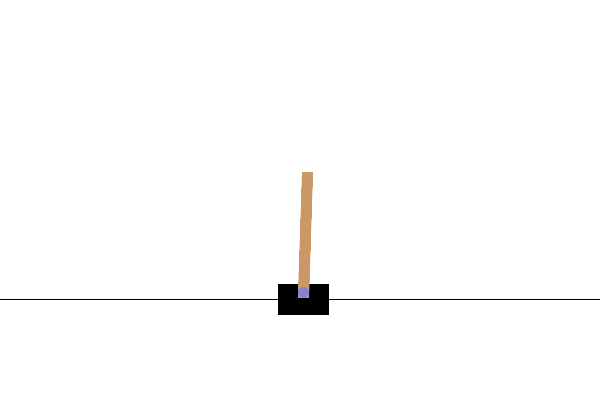

In [ ]:
import gymnasium as gym
env = gym.make("CartPole-v1", render_mode="rgb_array")
g = GIFMaker() # visualization
observation, info = env.reset(seed=42)
for i in range(500):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    print(i, action, observation, reward)
    g.append(env.render()) # save one frame
    if terminated or truncated:
        observation, info = env.reset()
        break
g.display() # show GIF animation
env.close()

## Env2 MountainCar-v0
Detailed information of this environment: https://gymnasium.farama.org/environments/classic_control/mountain_car/

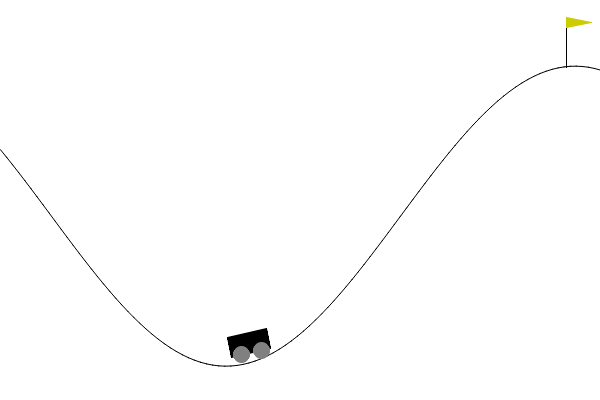

In [ ]:
env = gym.make("MountainCar-v0", render_mode="rgb_array")

observation, info = env.reset(seed=42)
g = GIFMaker()
for i in range(200):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    # print(i, action, observation, reward)
    g.append(env.render())
    if terminated or truncated:
        observation, info = env.reset()
        break
g.display()
env.close()

## Discretization
These environments are originally with continuous state spaces. We need to discretize them so we can apply (tabluar) MC and Q-Learning to them. Discretization is about mapping a continuous value to discrete bins and use the integer index of that bin to represent it.

For example: state (1,7, -2.3). We have bins for the first value (0, 1, 2) and for the second value (-3, 0, 3). Then we can discretize the state to (1, 0), which corresponding to the index (0-start) of the bins each state value falls into. If the state is (0.3, 2.9), we get discretized state (0, 1).

See also: https://numpy.org/doc/stable/reference/generated/numpy.digitize.html

**You are required to fill the number of discretized bins you want for each value in states, and the number of discrete actions.** You are encouraged to explore how different numbers of discretized states affect your algorithm performance.

**CartPole**:
- State: please have **3 to 10** discretized values for each value in the state. The state in CartPole has 4 values, corresponding to: cart position, velocity, pole angle, angular velocity. We will discretize individually for them. For example, you may have 3 discretized for cart position, 5 for velocity, and so on.
- Action: there are **2** actions:
 * 0: left
 * 1: right

**MountainCar**:
- State: please have **5 to 15** discretized values for each value in the state. The state in MountainCar has 2 values, corresponding to the position and velocity of the car.
- Action: there are **3** actions:
 * 0: Accelerate to the left
 * 1: Don’t accelerate
 * 2: Accelerate to the right

In [ ]:
import math
import numpy as np
from os import stat_result
import matplotlib.pyplot as plt
from tqdm import tqdm
class Discretizer():
    def __init__(
        self,
        min_state,
        max_state,
        num_states_each_dim,
        num_actions
    ):
        assert len(min_state) == len(max_state)
        assert len(min_state) == len(num_states_each_dim)
        self.min_state = min_state
        self.max_state = max_state
        self.num_states_each_dim = num_states_each_dim
        self.num_actions = num_actions
        self.bins = None
        self.build_bins()

    def build_bins(self):
        self.bins = []
        state_dim = len(self.min_state)
        for i in range(state_dim):
            bin = np.linspace(self.min_state[i], self.max_state[i], num=self.num_states_each_dim[i])[:-1]
            self.bins.append(bin)
        # print ("bins", [len(b) for b in self.bins])

    def discretize(self, state: np.ndarray) -> np.ndarray:
        state = np.clip(state, self.min_state, self.max_state)
        discretized_state = []
        for i in range(0, len(state)):
            discretized = np.digitize(state[i], self.bins[i])
            discretized_state.append(discretized)
        # print (discretized_state)
        discretized_state = np.array(discretized_state, dtype=int)
        return discretized_state

cartpole_discretizer = Discretizer(
    min_state = [-4.8, -5.0, -0.418, -5.0],   #min values for cart position, velocity, pole angle, angular velocity
    max_state = [4.8, 5.0, 0.418, 5.0],       #max values for cart position, velocity, pole angle, angular velocity
    # ====Please fill your codes here======
    num_states_each_dim = [3,5,7,9],     # number of discrized states for position, velocity, pole angle, angular velocity, a python list of integers []
    num_actions = [0,1],           # number of actions: left or right
    # ======================================

)

mountaincar_discretizer = Discretizer(
    min_state = [-1.2, -0.07],              # min values for position and veolcity as per the official doc
    max_state = [0.6, 0.07],                # max values for position and veolcity as per the official doc
    # ====Please fill your codes here======
    num_states_each_dim = [11,10],         # number of discretized states for position and velocity each, , a python list of integers []
    num_actions = [0,1,2],                        # num of actions: left , stay , right
    # ======================================
)

##Monte Carlo

You will implement a tabular MC, with epilion-soft policy. https://docs.google.com/presentation/d/11Hh0eXrJfznoOwHplXfk9yAPWFWeJ_PnpPBwrtyLgR8/edit#slide=id.g7e014821d8_0_256

In [ ]:
class MonteCarlo():
    def __init__(
        self,
        env,          # environment
        env_name,     # a string, the name of the environment
        discretizer,  # discretizer,
        eps=0.1,      # for eps-greedy
      ):

        self.env = env                                       # set env
        self.env_name = env_name                             # set env name
        self.eps = eps                                       # epsilon for epsion greedy
        self.mode = "update"                                 # mode to switch between update and evaluation of policy
        self.gif_maker = GIFMaker()                          # for visualizeation

        self.discretizer = discretizer                                # discretizer used to dicretize the observation
        self.state_dim = self.discretizer.num_states_each_dim         # get dimensions of discretized obersvation from helper
        self.action_dim = self.discretizer.num_actions                # get num of actions from helper

        # ====Please write your codes here======
        print(self.state_dim)
        print(self.action_dim)
        self.q_dim = (4,2)
        # q function dimenstion is state_dim x action_dim

        self.q = np.zeros(self.q_dim)  # initialize q function, an nparray in the shape of self.q_dim
        self.counter = np.zeros(self.q_dim) # counter used to track number of updates a particular index in q function, will be used in averaging returns
                                            # an nparray in the shape of self.q_dim, initialized by all zeros
        self.policy = np.ones(self.q_dim, dtype=float) * self.eps / self.q_dim # inital policy is uniform distribution, an nparray in the shape of self.q_dim.
        best_action = np.argmax(self.q[self.action_dim])
        self.policy[best_action] += (1.0 - self.eps)
        # for i in range(self.policy.shape[0]):
        #   for j in range(self.policy.shape[1]):
        #     self.policy[i][j] = np.random.uniform()    # the last dimension (which corresponding to all actions) should have sum=1 (representing probability)

        self.visited_states = []        # history of visited states. A python list. Should be cleared after each episode
        # ======================================
        print(f"Q function dimensions for {env_name}: {self.q_dim}")



    def reset_counter(self):                                 # used to reset counter, but not called in current implementation
        self.counter = np.zeros(self.q_dim)

    # visit next state and update the average return for a starting state
    # this is doing recursively
    def visit_next_state(self, state):
        # ====Please write your codes here======
        discretized_state = self.discretizer.discretize(state)    # convert the current state to discrete
        self.visited_states.append(discretized_state)  # put the discretized state in the visited state history

        p = self.policy[discretized_state]

        #self.eps/self.action_dim + (1-self.eps)
        # get the policy (probability) corresponding to that state
        # ======================================

        if self.mode == "update":
            # ====Please write your codes here======
            action = np.random.choice(self.action_dim, p=p)   # if mode is update, follow epsion policy according to policy p. You can use np.random.choice. The action should be an integer for example 0
            # ======================================
        elif self.mode == "eval" or self.mode == "vis":
            # ====Please write your codes here======
            action = np.argmax(p)   # if during evaluation pick the best action, according to p. The action should be an integer for example 0
            # ======================================

        next_state, reward, terminated, truncated, info = self.env.step(action)     # take the selected action and move to next state

        if self.mode == "vis":
            self.g.append(self.env.render())                                        # render if visualization

        if terminated or truncated:
            # ====Please write your codes here======
            return reward   # if terminated return current reward
            # ======================================

        else:
            # ====Please write your codes here======
            future_reward = self.visit_next_state(next_state)# call visit next state recursively to continue episode and get cumulative future reward
            reward = reward+future_reward       # reward for current state action is immediate reward + cumulative future reward
            index_q = state+action      # index into q function, according to state and action
            # self.counter    # increment state action counter, this is used for calculating the mean
            # # ======================================

            if self.mode == "update":
            # # ====Please write your codes here======
                self.q[index_q] = np.mean(reward) # update the q value of state, using the average value of all the returns it ever seens
            # ======================================

            # ====Please write your codes here======
            return future_reward # return the cumulative reward corresponding to "state"
            # ======================================

    # run for one episode
    def run_one_episode(self):
        state, info = self.env.reset()
        print(state)
        r = self.visit_next_state(state)
        return r

    # update policy based on new q function
    def update_policy(self):
        vs = self.visited_states
        # ====Please write your codes here======
        # for s in vs:
            # for each state in visited states
            # get best action based on q function and update it
            # no more code stubs here and you need to modify self.policy mostly
        # ======================================


    # policy update
    def update(self):
        self.mode = "update"
        r = self.run_one_episode()    # run one episode, update q function
        self.update_policy()          # update policy
        self.visited_states = []

    # policy evaluation for n episodes
    def eval(self, n):
        rewards = []
        self.mode = "eval"
        state, info = self.env.reset(seed=42)
        for i in range(n):
            r = self.run_one_episode()            # run one episode and get reward
            rewards.append(r)
        return np.mean(rewards)                   # return avergae reward over n episode

    # used for visualization
    def visualize(self):
        self.mode = "vis"
        self.g = GIFMaker()
        r = self.run_one_episode()
        print("Reward on this episode", r)
        if self.env_name != "tic_tac":
            self.g.display()

    # the main fucntion called to update policy and evaluate
    def execute(self, total_ep=5000, eval_freq=100, eval_ep=100):
        rewards = []   #used to track polciy evaluation across runs
        episodes = []  #number of episodes used to update policy
        self.reset_counter()

        prog_bar = tqdm(range(0, total_ep))
        for i in prog_bar:
            self.update()                      # update
            if (i+1) % eval_freq == 0:      # evaluate using eval_ep episodes every eval_freq policy updates
                reward = self.eval(eval_ep)
                rewards.append(reward)
                episodes.append(i)
        # print (episodes, rewards)
        plt.plot(episodes, rewards)   #plot evaluation reward vs episodes
        plt.xlabel('episodes')
        plt.ylabel('Rewards')
        plt.title('Monte carlo on '+self.env_name)
        plt.show()


In [ ]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
mc_cartpole = MonteCarlo(env, "CartPole", cartpole_discretizer, eps=0.1) # you can explore different eps (epsilon values)
mc_cartpole.execute(total_ep=100, eval_freq=10, eval_ep=10) # This will draw the reward vs. training reward plot for you. You can change differnet total_ep (total training episodes)

[3, 5, 7, 9]
[0, 1]
Q function dimensions for CartPole: (4, 2)


  0%|          | 0/100 [00:00<?, ?it/s]

[ 0.011462   -0.01774275  0.00206408 -0.00841097]


TypeError: ignored

In [ ]:
mc_cartpole.visualize()

In [ ]:
# ====Please write your codes here======
# Please perform a final evluation for your policy, and print out the average reward
# ======================================

In [ ]:
env = gym.make("MountainCar-v0", render_mode="rgb_array")
mc_mountaincar = MonteCarlo(env, "MountainCar", mountaincar_discretizer, eps=0.4) # you can explore different eps (epsilon values) and observe how it affects the learning
mc_mountaincar.execute(total_ep=3000, eval_freq=100, eval_ep=10) # This will draw the plot for you. You can change differnet total_ep (total training episodes)

In [ ]:
mc_mountaincar.visualize()

In [ ]:
# ====Please write your codes here======
# Please perform a final evluation for your policy, and print out the average reward
# ======================================

##Q-Learning

Mainly but not limited to https://docs.google.com/presentation/d/1kR098WCtvhd5yZ9DYq7q8CU-kRTXS4YXKEj8vE-d54E/edit#slide=id.g7e14319937_0_377.

This is will be in the similar form with MC. Please take advantage of the starter code stubs provided in MC.

In [ ]:
import numpy as np

class QLearning():
    def __init__(
        self,
        env,
        env_name,
        discretizer,
        eps=0.1
    ):
        self.env = env                                       # set env
        self.env_name = env_name                             # set env name
        self.eps = eps                                       # epsilon for epsion greedy
        self.mode = "update"                                 # mode to switch between update and evaluation of policy
        self.gif_maker = GIFMaker()                          # for visualizeation

        self.discretizer = discretizer                                # discretizer used to dicretize the observation
        self.state_dim = self.discretizer.num_states_each_dim         # get dimensions of discretized obersvation from helper
        self.action_dim = self.discretizer.num_actions                # get num of actions from helper

        # ====Please write your codes here======


        # ======================================
        print(f"Q function dimensions for {env_name}: {self.q_dim}")



    # used to visite next state
    def visit_next_state(self, state):
        # ====Please write your codes here======
        discretized_state = self.discretizer.discretize(state)

        # ======================================

    # update policy based on new q function
    def update_policy(self):
        # ====Please write your codes here======


        # ======================================


    # run for one episode
    def run_one_episode(self):
        state, info = self.env.reset()
        r = self.visit_next_state(state)
        return r

    #policy update
    def update(self):
        self.mode = "update"
        self.observation, self.info = self.env.reset()
        r = self.run_one_episode()         #run one episode, update q function
        self.update_policy()               #update policy

    #policy evaluation for n episodes
    def eval(self, n):
        rewards = []
        self.mode = "eval"
        state, info = self.env.reset(seed=42)
        for i in range(n):
            r = self.run_one_episode()            # run one episode and get reward
            rewards.append(r)
        return np.mean(rewards)                   # return avergae reward over n episode

    #used for visualization
    def visualize(self):
        r = 0
        self.mode = "vis"
        self.g = GIFMaker()
        r = r + self.run_one_episode()
        print("Reward on vis episode", r)
        if self.env_name != "tic_tac":
            self.g.display()

    #the main fucntion called to update policy and evaluate for niter of outer iterations
    def execute(self, total_ep=5000, eval_freq=100, eval_ep=100):
        rewards = []   #used to track polciy evaluation across runs
        episodes = []  #number of episodes used to update policy

        prog_bar = tqdm(range(0, total_ep))
        for i in prog_bar:
            self.update()                      # update
            if (i+1) % eval_freq == 0:      # evaluate using eval_ep episodes every eval_freq policy updates
                reward = self.eval(eval_ep)
                rewards.append(reward)
                episodes.append(i)
        # print (episodes, rewards)
        plt.plot(episodes, rewards)   #plot evaluation reward vs episodes
        plt.xlabel('episodes')
        plt.ylabel('Rewards')
        plt.title('Q Learning on '+self.env_name)
        plt.show()


In [ ]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
ql_cartpole = QLearning(env, "CartPole", cartpole_discretizer, eps=0.1) # you can explore different eps (epsilon values) and observe how it affects the learning
ql_cartpole.execute(total_ep=2000, eval_freq=100, eval_ep=10) # This will draw the plot for you. You can change differnet total_ep (total training episodes)

In [ ]:
ql_cartpole.visualize()

In [ ]:
# ====Please write your codes here======
# Please perform a final evluation for your policy, and print out the average reward
# ======================================

In [ ]:
env = gym.make("MountainCar-v0", render_mode="rgb_array")
ql_mountaincar = QLearning(env, "MountainCar", mountaincar_discretizer, eps=0.1) # you can explore different eps (epsilon values) and observe how it affects the learning
ql_mountaincar.execute(total_ep=2000, eval_freq=100, eval_ep=10) # This will draw the plot for you. You can change differnet total_ep (total training episodes)

In [ ]:
ql_mountaincar.visualize()

In [ ]:
# ====Please write your codes here======
# Please perform a final evluation for your policy, and print out the average reward
# ======================================